<a href="https://colab.research.google.com/github/barath220904/CODSOFT/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

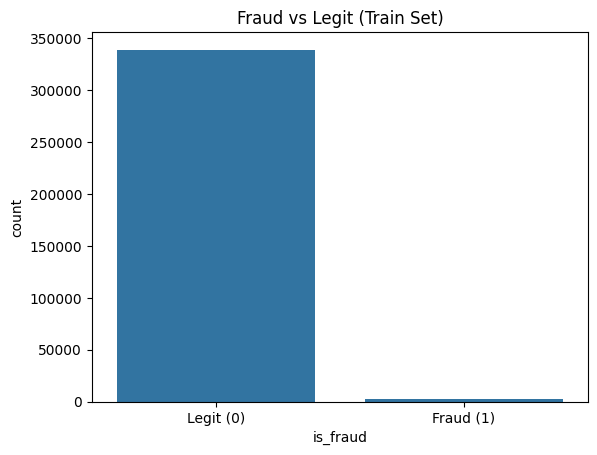


✅ Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    355039
         1.0       0.24      0.02      0.03      1660

    accuracy                           1.00    356699
   macro avg       0.62      0.51      0.51    356699
weighted avg       0.99      1.00      0.99    356699

📈 ROC-AUC Score: 0.5074174568027263


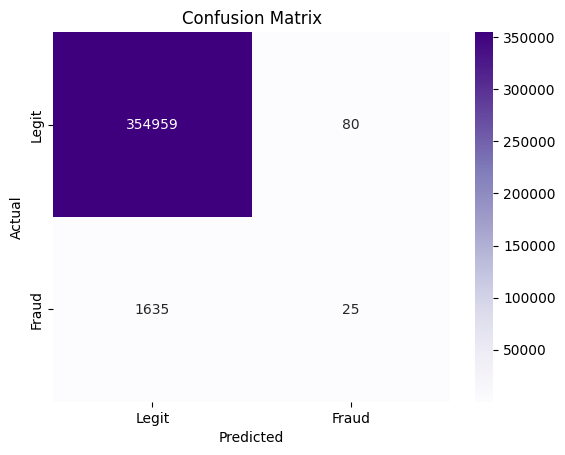


🧪 Predict Your Own Transaction (Enter numeric values)
Enter value for Unnamed: 0: 5689
Enter value for cc_num: 59265
Enter value for amt: 516
Enter value for zip: 0651
Enter value for lat: 56161
Enter value for long: 65165
Enter value for city_pop: 1651
Enter value for unix_time: 6505617
Enter value for merch_lat: 161561
Enter value for merch_long: 1651

🧾 Result → 🚨 Fraudulent Transaction Detected!


In [2]:
# 💳 Credit Card Fraud Detection with User Input

# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# 📂 Step 2: Load and Clean the Dataset
df_train = pd.read_csv("fraudTrain.csv", engine='python', on_bad_lines='skip')
df_test = pd.read_csv("fraudTest.csv", engine='python', on_bad_lines='skip')

# Drop rows with missing target labels
df_train.dropna(subset=['is_fraud'], inplace=True)
df_test.dropna(subset=['is_fraud'], inplace=True)

# Fill any remaining missing values with 0
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# 🔍 Step 3: Visualize Class Distribution
sns.countplot(x='is_fraud', data=df_train)
plt.title("Fraud vs Legit (Train Set)")
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'])
plt.show()

# 🧼 Step 4: Preprocessing

# Keep only numeric columns
df_train = df_train.select_dtypes(include=[np.number])
df_test = df_test.select_dtypes(include=[np.number])

# Separate features and labels
X_train = df_train.drop(columns=['is_fraud'])
y_train = df_train['is_fraud']
X_test = df_test.drop(columns=['is_fraud'])
y_test = df_test['is_fraud']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧠 Step 5: Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 📊 Step 6: Evaluate Model
y_pred = model.predict(X_test_scaled)

print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("📈 ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 🔎 Step 7: Predict Custom Input
print("\n🧪 Predict Your Own Transaction (Enter numeric values)")
input_features = list(X_train.columns)

user_input = []
for feature in input_features:
    while True:
        try:
            value = float(input(f"Enter value for {feature}: "))
            user_input.append(value)
            break
        except ValueError:
            print("❌ Invalid input. Please enter a numeric value.")

# Convert to numpy array, reshape, and scale
user_input_scaled = scaler.transform([user_input])
prediction = model.predict(user_input_scaled)

print("\n🧾 Result →", "🚨 Fraudulent Transaction Detected!" if prediction[0] == 1 else "✅ Legitimate Transaction")